# Efficiency boost for persistence image creation

In [4]:
import pymongo
import sys, os
import numpy as np
from sklearn.neighbors import KernelDensity 
sys.path.append('../..')
from nid import swcfunctions
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [5]:
client = pymongo.MongoClient(host="mongodb://localhost/27017/")
db = client.aibs
db.collection_names()

['nmorpho', 'features', 'morphology', 'persistence_barcodes', 'neurons']

In [6]:
db.nmorpho.find({"archive":"Bacci"}).count()

21

The "Bacci" cells seem to be a decent data sample to use.  

In [7]:
bacci_swc_files = os.listdir('../../data/Bacci/CNG version/')

In [8]:
# Observe data sample
db.nmorpho.find_one({'archive':"Bacci"})

{'_id': ObjectId('5a99bcfa9d477a4072e463ce'),
 '_links': {'measurements': {'href': 'http://neuromorpho.org/api/morphometry/id/34258'},
  'self': {'href': 'http://neuromorpho.org/api/neuron/id/34258'}},
 'age_classification': 'young',
 'archive': 'Bacci',
 'attributes': 'No Diameter, 3D, Angles',
 'brain_region': ['hippocampus', 'CA1'],
 'cell_type': ['Cannabinoid receptor (CB1R)-positive',
  'GABAergic',
  'basket',
  'perisomatic targeting',
  'interneuron',
  'Fast-spiking'],
 'corrected_value': None,
 'corrected_xy': None,
 'corrected_z': None,
 'deposition_date': '2013-02-01',
 'domain': 'Dendrites, Soma, Axon',
 'experiment_condition': 'Control',
 'magnification': '100',
 'max_age': '30.0',
 'max_weight': None,
 'min_age': '20.0',
 'min_weight': None,
 'neuron_id': 34258,
 'neuron_name': 'A090622',
 'note': '',
 'objective_type': 'Not reported',
 'original_format': 'Neurolucida.dat',
 'physical_Integrity': 'Dendrites Complete, Axon Moderate',
 'png_url': 'http://neuromorpho.org/im

In [9]:
ntrees = persistence_barcodes = {}

In [8]:
bacci_swc_files[8]

'H091127-2.CNG.swc'

In [10]:
ls ../../data/bacci/CNG\ version/

A090622.CNG.swc    C091118.CNG.swc    E091118.CNG.swc    G90206.CNG.swc
A090909.CNG.swc    C101118.CNG.swc    E100616.CNG.swc    H091127-1.CNG.swc
A091109.CNG.swc    C81113.CNG.swc     F091109.CNG.swc    H091127-2.CNG.swc
A81212.CNG.swc     D090910.CNG.swc    F091118.CNG.swc
B091130.CNG.swc    D091030.CNG.swc    F091130.CNG.swc
C091109.CNG.swc    D90203.CNG.swc     F100616.CNG.swc


In [12]:
skiprows = []
for a in bacci_swc_files: 
    name = a.split('.')[0]
    skiprows.append(int(input(prompt=swcfunctions.NTree.preview_file('../../data/bacci/CNG version/'+a))))

First 15 lines of `../../data/bacci/CNG version/H091127-1.CNG.swc`:

0	# Original file H091127-1.swc edited using StdSwc version 1.31 on 11/23/15.

1	# Irregularities and fixes documented in H091127-1.swc.std. See StdSwc1.31.doc for more information.

2	#

3	# Neurolucida to SWC conversion from L-Measure. Sridevi Polavaram: spolavar@gmu.edu

4	# Original fileName:C:UserspraveenDesktopDataProcessingCurrentArchivesProcessedv6.3Bacci2neuronsH091127-1.asc

5	#The original file has a single soma contour that is averaged into 3 soma points

6	# NEUROMANTIC V1.7.5 (11/23/2015 9:56:31 AM): Saved to H091127-1-t1.asc.swc

7	1 1 0.0 0.0 0.0 6.8735 -1

8	2 1 6.69 -1.56 0.0 6.8735 1

9	3 1 -6.69 1.56 0.0 6.8735 1

10	4 3 -8.01 7.25 -0.22 .045 1

11	5 3 -10.1 8.88 -2.27 .045 4

12	6 3 -10.27 8.92 -2.27 .045 5

13	7 3 -12.67 10.81 -4.01 .045 6

14	8 3 -17.75 15.03 -4.69 .045 7

First 15 lines of `../../data/bacci/CNG version/E100616.CNG.swc`:

0	# Original file E100616.swc edited using StdSwc version

In [13]:
skiprows

['7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '6',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '9',
 '7',
 '7',
 '9']

In [7]:
ntrees = pbcodes = {}

In [16]:
pbcodes.keys()

dict_keys(['H091127-1.CNG.swc', 'E100616.CNG.swc', 'A090909.CNG.swc', 'F100616.CNG.swc', 'A090622.CNG.swc', 'F091118.CNG.swc', 'A091109.CNG.swc', 'D091030.CNG.swc'])

In [35]:
%pdb

Automatic pdb calling has been turned OFF


In [34]:
for a in bacci_swc_files[17:]: 
    name = a.split('.')
    path = '../../data/bacci/CNG version/'+a
    ntree = swcfunctions.NTree(path,skiprows=7)
    print('ntree created for {}'.format(a))
#    ntree.preview_file()
    pbcodes[a] = ntree.get_persistence_barcode()
    print('barcode created for {}'.format(a))

ValueError: cannot convert float NaN to integer

> /Users/User1/DS/aibs/nid/swcfunctions.py(42)get_child_list()
     40     childlist = collections.defaultdict(list)
     41     for row in n_df.iterrows():
---> 42         childlist[int(row[1]['parent'])].append(row[0])
     43     # if childlist.get(-1):
     44     #     del childlist[-1]



In [49]:
len(pbcodes)

17

In [21]:
bacci_swc_files[9:10]

['C81113.CNG.swc']

In [50]:
for a in bacci_swc_files[17:18]: 
    name = a.split('.')
    path = '../../data/bacci/CNG version/'+a
    ntree.preview_file(path)

First 15 lines of `../../data/bacci/CNG version/D90203.CNG.swc`:

0	# Original file D90203.swc edited using StdSwc version 1.31 on 6/24/15.

1	# Irregularities and fixes documented in D90203.swc.std. See StdSwc1.31.doc for more information.

2	#

3	# SWC to SWC conversion from L-Measure. Sridevi Polavaram: spolavar@gmu.edu

4	# Original fileName:C:UserspraveenDesktopDataProcessingCurrentArchivesTo be processedAxon SticherBacciD90203.asc.swc_connected.swc

5	#

6	# generated by Vaa3D Plugin neuron_connector

7	# id,type,x,y,z,r,pid

8	# NEUROMANTIC V1.6.3 (6/24/2015 2:20:17 PM): Saved to D90203-T1.swc

9	1 2 0.0 0.0 0.0 .550 -1

10	2 2 -1.89 1.46 0.0 .550 1

11	3 2 -1.13 4.24 0.0 .550 2

12	4 2 1.36 6.46 0.0 .550 3

13	5 2 1.61 6.47 0.0 .550 4

14	6 2 7.78 5.89 0.0 .550 5



In [16]:
for a in bacci_swc_files[6:7]: 
    name = a.split('.')
    path = '../../data/bacci/CNG version/'+a
    ntree = swcfunctions.NTree(path,skiprows=7)
    print('ntree created for {}'.format(a))
#    ntree.preview_file()
    pbcodes[a] = ntree.get_persistence_barcode()
    print('barcode created for {}'.format(a))

ntree created for A091109.CNG.swc
barcode created for A091109.CNG.swc


In [26]:
path

'../../data/bacci/CNG version/D90203.CNG.swc'

In [27]:
swcfunctions.NTree.preview_file(path)

First 15 lines of `../../data/bacci/CNG version/D90203.CNG.swc`:

0	# Original file D90203.swc edited using StdSwc version 1.31 on 6/24/15.

1	# Irregularities and fixes documented in D90203.swc.std. See StdSwc1.31.doc for more information.

2	#

3	# SWC to SWC conversion from L-Measure. Sridevi Polavaram: spolavar@gmu.edu

4	# Original fileName:C:UserspraveenDesktopDataProcessingCurrentArchivesTo be processedAxon SticherBacciD90203.asc.swc_connected.swc

5	#

6	# generated by Vaa3D Plugin neuron_connector

7	# id,type,x,y,z,r,pid

8	# NEUROMANTIC V1.6.3 (6/24/2015 2:20:17 PM): Saved to D90203-T1.swc

9	1 2 0.0 0.0 0.0 .550 -1

10	2 2 -1.89 1.46 0.0 .550 1

11	3 2 -1.13 4.24 0.0 .550 2

12	4 2 1.36 6.46 0.0 .550 3

13	5 2 1.61 6.47 0.0 .550 4

14	6 2 7.78 5.89 0.0 .550 5



In [32]:
bacci_swc_files

['H091127-1.CNG.swc',
 'E100616.CNG.swc',
 'A090909.CNG.swc',
 'F100616.CNG.swc',
 'A090622.CNG.swc',
 'F091118.CNG.swc',
 'A091109.CNG.swc',
 'D091030.CNG.swc',
 'H091127-2.CNG.swc',
 'C81113.CNG.swc',
 'E091118.CNG.swc',
 'F091109.CNG.swc',
 'A81212.CNG.swc',
 'G90206.CNG.swc',
 'C091109.CNG.swc',
 'C101118.CNG.swc',
 'C091118.CNG.swc',
 'D90203.CNG.swc',
 'F091130.CNG.swc',
 'B091130.CNG.swc',
 'D090910.CNG.swc']

In [ ]:
%pdb

In [77]:
a = bacci_swc_files[19]
path = '../../data/bacci/CNG version/'+a
ntree.preview_file(path)
ntree = swcfunctions.NTree(path,skiprows=7)
print('ntree created for {}'.format(a))
pbcodes[a] = ntree.get_persistence_barcode()
print('barcode created for {}'.format(a))


First 15 lines of `../../data/bacci/CNG version/B091130.CNG.swc`:

0	# Original file B091130.swc edited using StdSwc version 1.31 on 6/24/15.

1	# Irregularities and fixes documented in B091130.swc.std. See StdSwc1.31.doc for more information.

2	#

3	# SWC to SWC conversion from L-Measure. Sridevi Polavaram: spolavar@gmu.edu

4	# Original fileName:C:UserspraveenDesktopDataProcessingCurrentArchivesTo be processedAxon SticherBacciB091130.asc.swc_connected.swc

5	#

6	# generated by Vaa3D Plugin neuron_connector

7	1 1 0.0 0.0 0.0 14.21 -1

8	2 1 -1.57 -14.06 -1.21 14.21 1

9	3 1 1.57 14.06 1.21 14.21 1

10	4 3 2.4 11.34 -1.47 .090 1

11	5 3 2.6 11.51 -1.48 .090 4

12	6 3 5.38 21.58 -0.84 .090 5

13	7 3 5.55 23.04 -0.72 .090 6

14	8 3 7.33 30.8 -0.17 .090 7

ntree created for B091130.CNG.swc
barcode created for B091130.CNG.swc


In [78]:
len(pbcodes)

20

In [65]:
for a in bacci_swc_files[20:]: 
    name = a.split('.')
    path = '../../data/bacci/CNG version/'+a
    ntree.preview_file(path)
    ntree = swcfunctions.NTree(path,skiprows=9)
    print('ntree created for {}'.format(a))
#    ntree.preview_file()
    pbcodes[a] = ntree.get_persistence_barcode()
    print('barcode created for {}'.format(a))

First 15 lines of `../../data/bacci/CNG version/D090910.CNG.swc`:

0	# Original file D090910.swc edited using StdSwc version 1.31 on 6/24/15.

1	# Irregularities and fixes documented in D090910.swc.std. See StdSwc1.31.doc for more information.

2	#

3	# SWC to SWC conversion from L-Measure. Sridevi Polavaram: spolavar@gmu.edu

4	# Original fileName:C:UserspraveenDesktopDataProcessingCurrentArchivesTo be processedAxon SticherBacciD090910.asc.swc_connected.swc

5	#

6	# generated by Vaa3D Plugin neuron_connector

7	# id,type,x,y,z,r,pid

8	# NEUROMANTIC V1.6.3 (6/24/2015 1:31:54 PM): Saved to D090910-T1.swc

9	1 1 0.0 0.0 0.0 22.665 -1

10	2 1 -19.52 11.51 0.0 22.665 1

11	3 1 19.52 -11.51 0.0 22.665 1

12	4 3 3.32 7.29 2.76 .090 1

13	5 3 -1.54 11.02 5.26 .090 4

14	6 3 -1.54 11.02 6.32 .090 5

ntree created for D090910.CNG.swc
barcode created for D090910.CNG.swc


In [196]:
ls ../../data/bacci/CNG\ version/

A090622.CNG.swc    C091118.CNG.swc    E091118.CNG.swc    G90206.CNG.swc
A090909.CNG.swc    C101118.CNG.swc    E100616.CNG.swc    H091127-1.CNG.swc
A091109.CNG.swc    C81113.CNG.swc     F091109.CNG.swc    H091127-2.CNG.swc
A81212.CNG.swc     D090910.CNG.swc    F091118.CNG.swc
B091130.CNG.swc    D091030.CNG.swc    F091130.CNG.swc
C091109.CNG.swc    D90203.CNG.swc     F100616.CNG.swc


In [22]:
type(np.array([1,2]))

numpy.ndarray

In [66]:
for a in pbcodes.values():
    print(np.array(a).shape)

(98, 2)
(84, 2)
(129, 2)
(43, 2)
(118, 2)
(118, 2)
(159, 2)
(103, 2)
(229, 2)
(86, 2)
(51, 2)
(44, 2)
(220, 2)
(70, 2)
(141, 2)
(88, 2)
(85, 2)
(113, 2)
(125, 2)
(87, 2)


In [69]:
num_cells = len(list(pbcodes.values()))

d_points, dims = np.array(list(pbcodes.values())[0]).shape

vals = np.empty(num_cells)[:,np.newaxis]

In [70]:
X_grid, Y_grid = np.mgrid[0:400:400j,0:400:400j] 
grid = np.vstack([X_grid.ravel(),Y_grid.ravel()])

In [71]:
Zs = np.empty((num_cells,400*400))

In [72]:
for i, a in enumerate(pbcodes.values()): 
    val = np.array([*zip(*a)])
    skl_kernel = KernelDensity(bandwidth=43.48)
    skl_kernel.fit(val.T)
    Zs[i] = np.exp(skl_kernel.score_samples(grid.T))

In [64]:
tree_child = {}
tree_parent = {}

In [71]:
for k,v in tree_child.items(): 
    for c in v: 
        tree_parent[c] = [k] 

In [75]:
len(cell_name)

20

In [73]:
cell_name = list(pbcodes.keys()) 

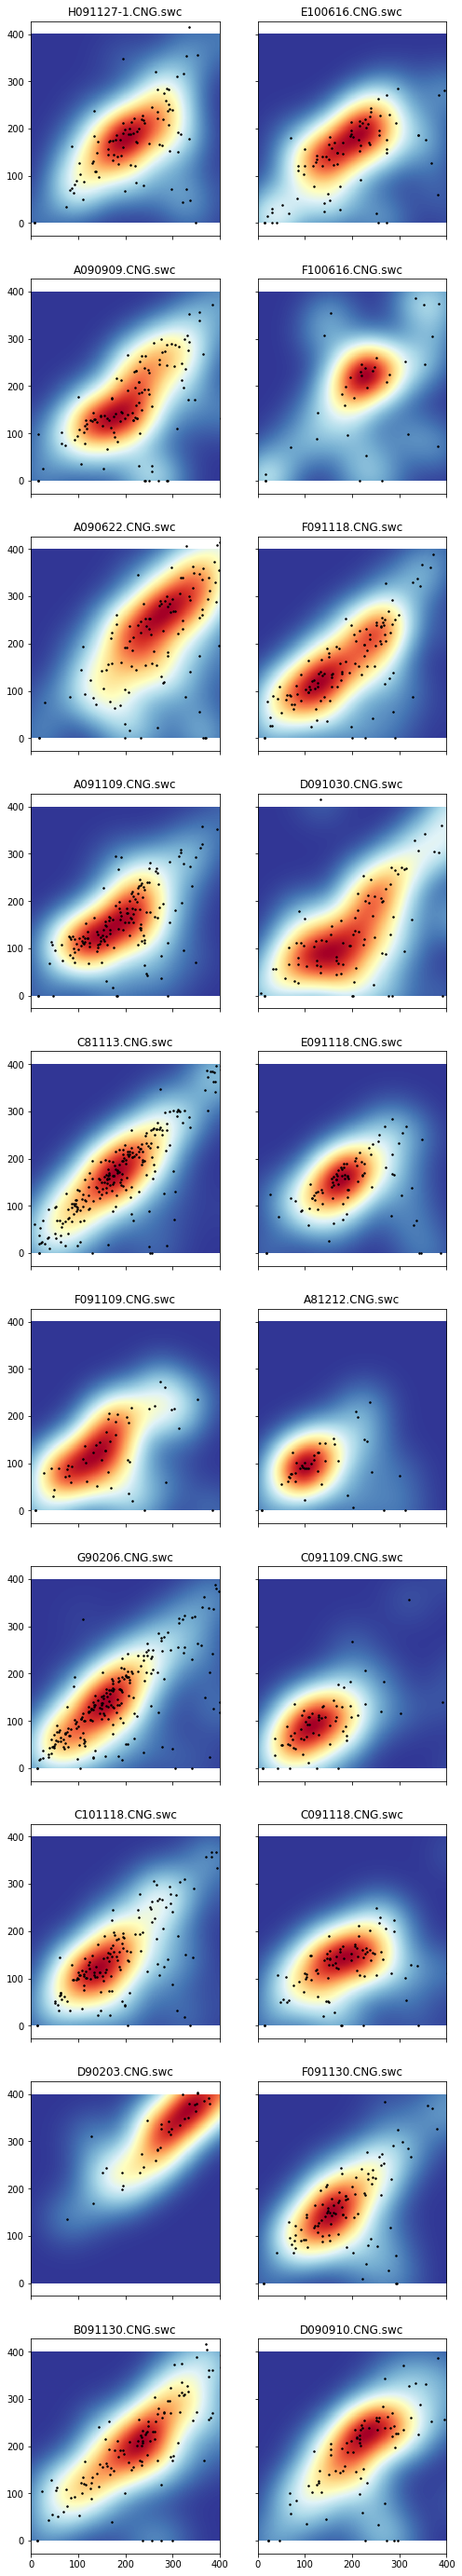

In [79]:
fig,ax = plt.subplots(10,2, sharex=True, sharey=True)
fig.set_size_inches(8,50)
axs = ax.flatten()
for i, a in enumerate(Zs): 
    v0,v1 = np.array([*zip(*list(pbcodes.values())[i])])
    axs[i].imshow(np.rot90(a.reshape(400,-1)), cmap=plt.cm.RdYlBu_r, extent=[0, 400, 0, 400])
    axs[i].plot( v0, v1, 'k.', markersize=3)
    axs[i].set_xlim([0, 400])
    axs[i].set_ylim([0, 400])
    axs[i].set(title=cell_name[i])


In [157]:
# Retrieve cell images from source 
png_urls = [a['png_url'] for a in db.nmorpho.find({'archive':"Bacci"})]

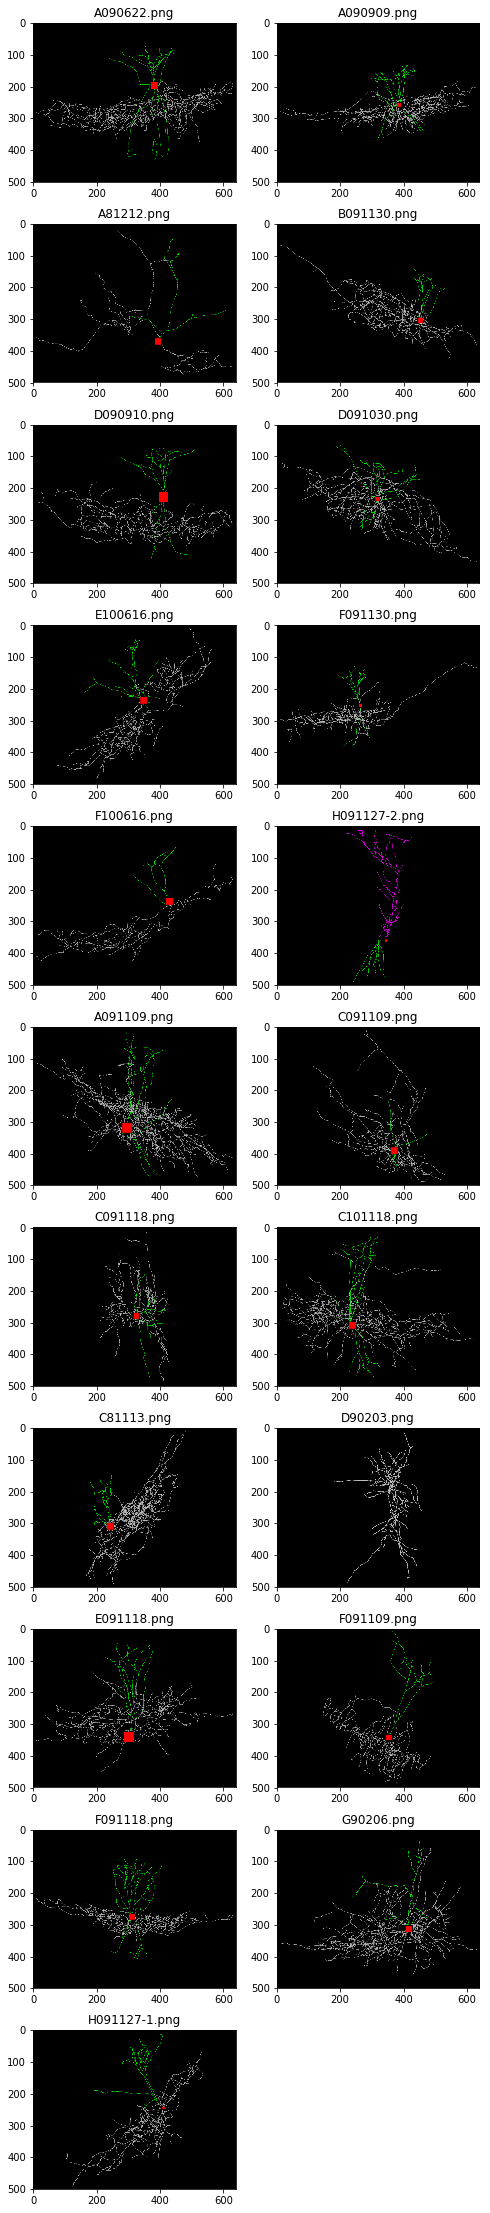

In [180]:
from PIL import Image
import requests 
fig=plt.figure(figsize=(8,40))
for i in range(len(png_urls)): 
    ax = plt.subplot(11,2,i+1)
    plt.imshow(Image.open(requests.get(png_urls[i], stream=True).raw))
    ax.set_title(png_urls[i].split('/')[-1])

In [3]:
dir()

['In',
 'KernelDensity',
 'Out',
 '_',
 '_2',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'np',
 'os',
 'pickle',
 'plt',
 'pymongo',
 'quit',
 'sns',
 'swcfunctions',
 'sys']

In [ ]:
import 